### Prediction of fuel consumption

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data

In [3]:
cols = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration', 'model year', 'origin']

In [4]:
df=pd.read_csv('./auto-mpg.csv', names=cols, na_values = "?", comment = '\t', sep= ' ', skipinitialspace=True)

In [5]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1


### EDA

In [6]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [7]:
median = df['horsepower'].median()

In [8]:
df['horsepower'] = df['horsepower'].fillna(median)

In [9]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [10]:
df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [11]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

### Visualize correlations

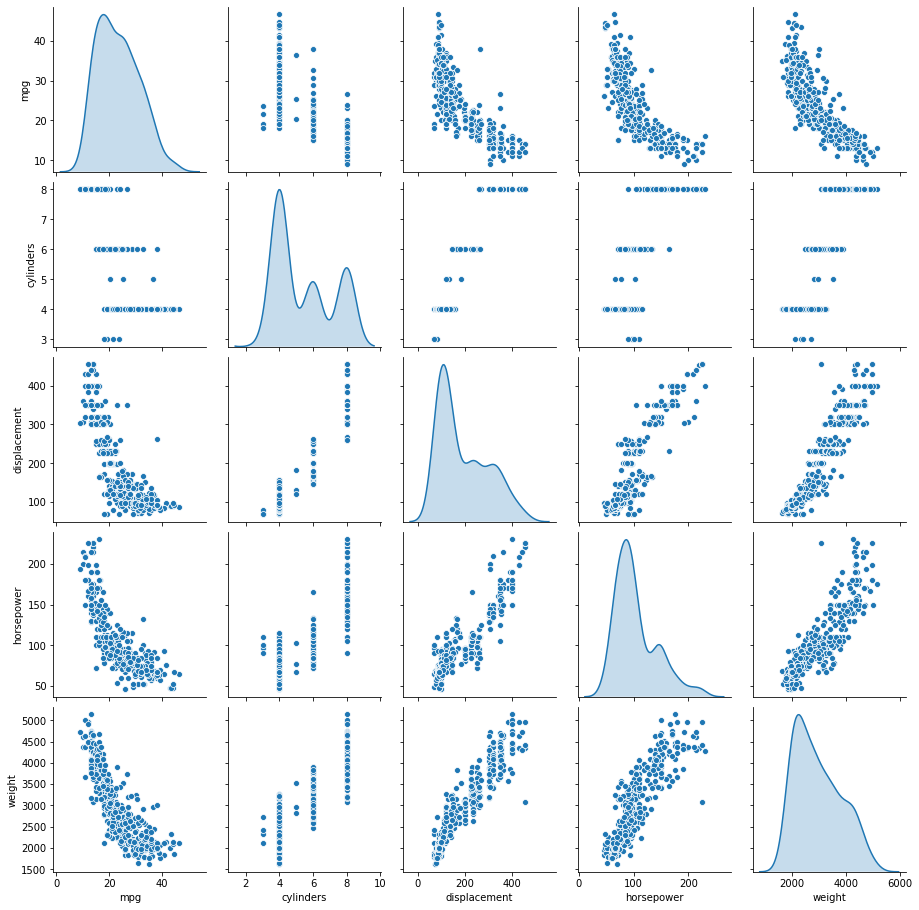

In [12]:
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']], diag_kind="kde")

#### Target (mpg) is negatively correlated with displacement, horsepower and weight 

### Scaling and Encoding

In [13]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1


In [14]:
df_num= df.iloc[:, 1:7].values

In [15]:
df_num.shape

(398, 6)

In [16]:
df_cat= df.iloc[:, -1].values

In [17]:
#df_cat

In [18]:
df_cat.shape

(398,)

In [19]:
x_mean= np.zeros(6, dtype=float)

In [20]:
x_std = np.zeros(6, dtype=float)

In [21]:
x_mean[0] = df['cylinders'].mean()
x_mean[1] = df['displacement'].mean()
x_mean[2] = df['horsepower'].mean()
x_mean[3] = df['weight'].mean()
x_mean[4] = df['acceleration'].mean()
x_mean[5] = df['model year'].mean()

x_std[0] = df['cylinders'].std()
x_std[1] = df['displacement'].std()
x_std[2] = df['horsepower'].std()
x_std[3] = df['weight'].std()
x_std[4] = df['acceleration'].std()
x_std[5] = df['model year'].std()

In [22]:
x_mean

array([   5.45477387,  193.4258794 ,  104.3040201 , 2970.42462312,
         15.56809045,   76.01005025])

In [23]:
x_std

array([  1.70100424, 104.26983817,  38.22262487, 846.8417742 ,
         2.75768893,   3.69762665])

#### Save mean and std for the server deployment

In [24]:
with open('Xmean.npy', 'wb') as f:
    np.save(f, x_mean)
f.close()
with open('Xstd.npy', 'wb') as f:
    np.save(f, x_std)
f.close()

In [25]:
#mpg 	cylinders 	displacement 	horsepower 	weight 	acceleration 	model year 	origin

In [26]:
def std_scaler(df, x_mean, x_std ):
    X_num = np.zeros((df.shape[0], 6), dtype=float)
    print(X_num.shape)
    for i in range(0, df.shape[0]):
        X_num[i, 0] = ( df[i,0] - x_mean[0] ) / x_std[0]
        X_num[i, 1] = ( df[i,1] - x_mean[1] ) / x_std[1]
        X_num[i, 2] = ( df[i,2] - x_mean[2] ) / x_std[2]
        X_num[i, 3] = ( df[i,3] - x_mean[3] ) / x_std[3]
        X_num[i, 4] = ( df[i,4] - x_mean[4] ) / x_std[4]
        X_num[i, 5] = ( df[i,5] - x_mean[5] ) / x_std[5]
    return X_num

In [27]:
X_num = np.zeros((df_num.shape[0], 6), dtype=float)

In [28]:
x_num = std_scaler(df_num, x_mean, x_std )

(398, 6)


In [29]:
x_num[0]

array([ 1.49630792,  1.08923273,  0.67227146,  0.63007683, -1.29386981,
       -1.6253805 ])

In [30]:
def OneHot_Encoder(df):
    X_cat = np.zeros((df.shape[0], 3), dtype=float)
    for i in range(0, df.shape[0]):
        if (df[i] == 1):
            X_cat[i,0] = 1.0
            X_cat[i,1] = 0.0
            X_cat[i,2] = 0.0
        elif (df[i] == 2) :
            X_cat[i,0] = 0.0
            X_cat[i,1] = 1.0
            X_cat[i,2] = 0.0
        else :
            X_cat[i,0] = 0.0
            X_cat[i,1] = 0.0
            X_cat[i,2] = 1.0
    return X_cat

In [31]:
X_cat = np.zeros((df_cat.shape[0], 3), dtype=float)

In [32]:
X_cat = OneHot_Encoder(df_cat)

In [33]:
#X_cat[30:50]

In [34]:
X_norm=np.zeros((df_cat.shape[0], 9), dtype=float)

In [35]:
X_norm= np.concatenate((x_num,X_cat),axis=1)

In [36]:
X_norm[0]

array([ 1.49630792,  1.08923273,  0.67227146,  0.63007683, -1.29386981,
       -1.6253805 ,  1.        ,  0.        ,  0.        ])

In [37]:
y=df.iloc[:, 0].values

In [38]:
y.shape

(398,)

### Train-test split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

### Building the sequential model

In [41]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [42]:
def create_model():
    model = Sequential()
    model.add(Dense(96, activation='relu', input_shape=X_train[1].shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mse', metrics=['mae', 'mse'])
    return model

In [43]:
model=create_model()

In [45]:
#model.summary()

In [46]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [47]:
#https://www.tensorflow.org/tutorials/keras/regression

In [48]:
epoch=2500
batch=32

In [49]:
history = model.fit(X_train, y_train, epochs=epoch, validation_split = 0.2, verbose=0)

In [50]:
#hist = pd.DataFrame(history.history)
#hist['epoch'] = history.epoch
#hist.tail()

In [51]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'nae')

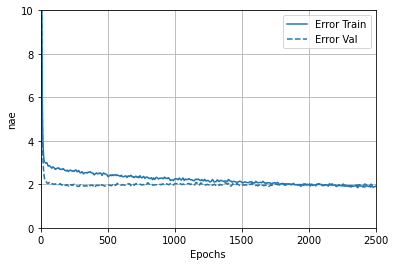

In [52]:
plotter.plot({'error': history}, metric = "mae")
plt.ylim([0, 10])
plt.xlim([0, epoch])
plt.ylabel('nae')


In [53]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print(f"MAE (test data):", mae)

3/3 - 0s - loss: 7.5450 - mae: 1.9613 - mse: 7.5450
MAE (test data): 1.9612619876861572


### Predictions

In [54]:
from sklearn.metrics import r2_score

In [55]:
y_pred = model.predict(X_test)

In [56]:
print(f'R2: {r2_score(y_test, y_pred)}')

R2: 0.881100570002098


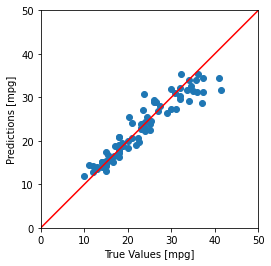

In [57]:
plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [mpg]')
plt.ylabel('Predictions [mpg]')
rang = [0, 50]
plt.xlim(rang)
plt.ylim(rang)
plt.plot(rang, rang, c='red')

### Save the model

In [58]:
model.save("auto_mpg_model.h5")

### Test

In [59]:
import json

data={
"cylinders": 8,
"displacement": 400,
"horsepower": 80,
"weight": 2000,
"acceleration": 19,
"model year": 72,
"origin": 1
}

with open('data.json', 'w') as f:
    json.dump(data, f)
f.close()


In [63]:
ds = pd.DataFrame([data])

In [64]:
ds.to_csv('input_data.csv', index = False) 